In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('Position_Salaries.csv')
print(data.head())

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
x=data.iloc[:,1].values.reshape(-1,1)
y=data.iloc[:,-1].values.reshape(-1,1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [7]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x,y)

SVR()

In [8]:
sc_y.inverse_transform(svr.predict(sc_x.transform([[9]])))

array([471671.95587315])

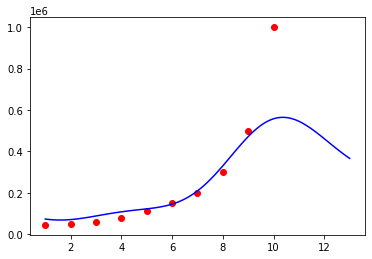

In [14]:
x_grid=np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(y)),0.1).reshape(-1,1)
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(svr.predict(sc_x.transform(x_grid))),color='blue')